In [18]:
# import sys, datetime
import serial.tools.list_ports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
import time, os
from datetime import datetime

In [36]:
df0 = pd.read_csv('data/raw_data_2_mufta_bez_vintov.csv')

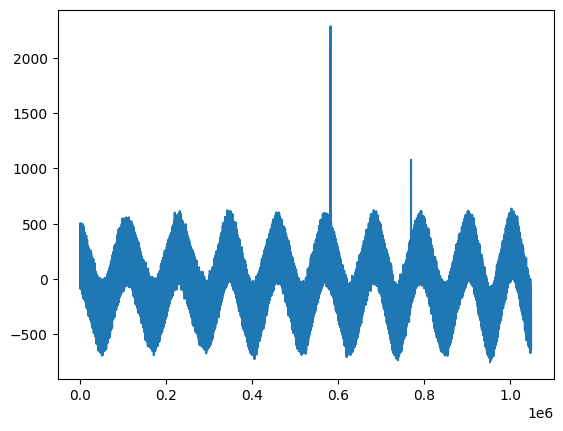

In [38]:
%matplotlib inline
plt.plot(df0.data)

In [ ]:
def median_filter(data, window_size):
    """
    Простой медианный фильтр
    
    Parameters:
    data (array): исходный сигнал
    window_size (int): размер окна фильтра (нечетное число)
    
    Returns:
    array: отфильтрованный сигнал
    """
    if window_size % 2 == 0:
        raise ValueError("Размер окна должен быть нечетным числом")
    
    # Создаем копию данных для результата
    result = np.zeros_like(data)
    half_window = window_size // 2
    
    # Обрабатываем центральную часть сигнала
    for i in range(half_window, len(data) - half_window):
        window = data[i - half_window:i + half_window + 1]
        result[i] = np.median(window)
    
    # Обрабатываем края (просто копируем исходные значения)
    result[:half_window] = data[:half_window]
    result[-half_window:] = data[-half_window:]
    
    return result

filtered_data = median_filter(df.data, window_size=11)

In [40]:
# Применяем медианный фильтр из scipy
window_size = 3
df = pd.DataFrame(columns=['data', 'encoder'])
df.data = signal.medfilt(df0.data, kernel_size=window_size)
df.encoder = signal.medfilt(df0.encoder, kernel_size=window_size)

In [42]:
%matplotlib qt5
plt.plot(df0.data)
plt.plot(df.data)

In [33]:
try:
    os.mkdir('data')
except FileExistsError:
    pass
except Exception as e:
    print(f'Что-то пошло не так: {e}')

filename = f"filtered_data_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.csv"
dir = 'data'

df.to_csv(os.path.join(dir, filename))